In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import logspace

In [2]:
df = pd.read_csv('master_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,12,13,14,15,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df.drop('Unnamed: 0', axis='columns')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032705 entries, 0 to 1032704
Data columns (total 20 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   video_id           1032705 non-null  object 
 1   title              1032705 non-null  object 
 2   channel_id         37422 non-null    object 
 3   channel_title      37422 non-null    object 
 4   published_at       37422 non-null    object 
 5   view_count         1032705 non-null  int64  
 6   likes              1032705 non-null  int64  
 7   dislikes           1032705 non-null  int64  
 8   comment_count      1032705 non-null  int64  
 9   tags               1032705 non-null  object 
 10  description        1005092 non-null  object 
 11  comments           37264 non-null    object 
 12  publishedAt        995283 non-null   object 
 13  channelId          995283 non-null   object 
 14  channelTitle       995282 non-null   object 
 15  categoryId         995283 non-nu

In [5]:
df.head(5)

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments,publishedAt,channelId,channelTitle,categoryId,trending_date,thumbnail_link,comments_disabled,ratings_disabled
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['combined_rating'] = df['likes'] - df['dislikes']
df['activity'] = df['likes'] + df['dislikes']
df['favorability'] = df['combined_rating'] / df['activity']

In [7]:
views = df['view_count'].sort_values()
views

117311             0
469112             0
141314             0
206516             0
415711             0
             ...    
34758      671712535
16270      915874131
18127      976281963
7955      1269596718
26143     1322796924
Name: view_count, Length: 1032705, dtype: int64

In [8]:
views.isna().sum()

0

In [9]:
df_nonzero_views = df[df['view_count'] != 0]

In [10]:
df.shape[0] - df_nonzero_views.shape[0]

102

102 records have no views and should be ignored

In [11]:
(df_nonzero_views['view_count'].min(), df_nonzero_views['view_count'].max())

(7225, 1322796924)

In [12]:
df_nonzero_views['view_count'].describe()

count    1.032603e+06
mean     1.867918e+06
std      7.558826e+06
min      7.225000e+03
25%      2.160810e+05
50%      5.224360e+05
75%      1.349830e+06
max      1.322797e+09
Name: view_count, dtype: float64

In [13]:
# df_nonzero_views['view_count'].plot.line(x='index', y='view_count', figsize=(15, 6))

In [14]:
# buckets = pd.qcut(df_nonzero_views['view_count'], q=4, labels=['low', 'medium', 'high', 'extreme'])
# buckets.value_counts()

In [15]:
# df_nonzero_views.plot.scatter(x='view_count', y='view_count', figsize=(15, 15), logx=True, logy=True)

In [16]:
# df_nonzero_views['view_count'].rolling(window=1000).mean().plot()

<AxesSubplot:>

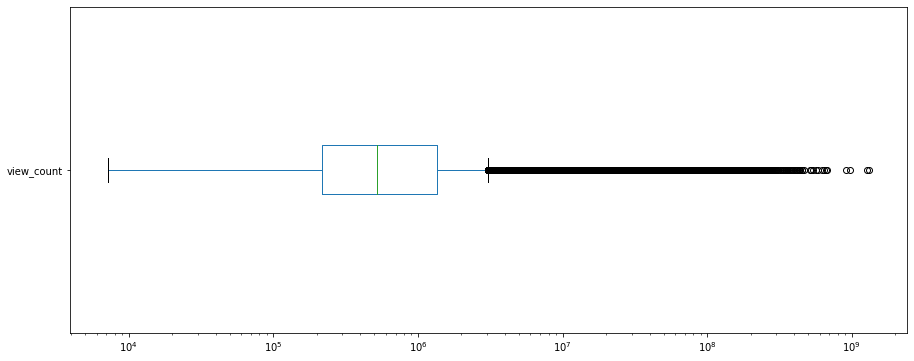

In [17]:
df_nonzero_views['view_count'].plot.box(figsize=(15, 6), vert=False, logx=True)

# View Count Distribution
Most of the videos we have data on are between 10^5 and 10^8 views

In [18]:
labels = [*range(1,10)]
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
bins = logspace(1,10, num=10)
bins

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

In [20]:
view_bins = pd.cut(df_nonzero_views['view_count'], bins=bins, labels=labels)
view_bins

0          6
1          7
2          5
3          6
4          5
          ..
1032700    5
1032701    5
1032702    5
1032703    5
1032704    5
Name: view_count, Length: 1032603, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]

In [21]:
view_bins.value_counts()

5    596222
6    299391
4    105633
7     30459
8       888
3         8
9         2
2         0
1         0
Name: view_count, dtype: int64

In [151]:
# view_bins.value_counts().sort_index().plot.line()

<AxesSubplot:ylabel='Frequency'>

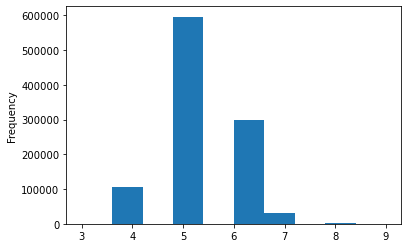

In [22]:
view_bins.astype(int).plot.hist()

Another way of visualizing the view count distribution. X axis bins correspond to the below.

In [23]:
bins

array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10])

This means most of our videos have between 100,000 (10^5) and 100,000,000 (10^8) views

## Feature Exploration

In [24]:
df[['likes', 'dislikes', 'activity', 'combined_rating', 'favorability']]

,likes,dislikes,activity,combined_rating,favorability
0,19515,226,19741,19289,0.977103
1,359277,7479,366756,351798,0.959215
2,11212,401,11613,10811,0.930939
3,39131,441,39572,38690,0.977712
4,32887,367,33254,32520,0.977927
...,...,...,...,...,...
1032700,12102,0,12102,12102,1.000000
1032701,47849,0,47849,47849,1.000000
1032702,7424,0,7424,7424,1.000000
1032703,25839,0,25839,25839,1.000000


## Feature Explanation

### Likes/Dislikes
The standard Youtube statistic
### Activity
Likes + Dislikes. The attention a video has drawn to get people to vote one way or the other.
### Combined Rating
Likes - Dislikes. Closer to 0 means more contentious, more negative => largely dislikes, more positive => largely likes
### Favorability
Combined Rating / Activity. Range of -1 to 1. Combined Rating normalized by how much total reaction a video drew from people. -1 means strong dislike, 1 means strong like, 0 means contentious or no data

In [25]:
video_responses = df[['likes', 'dislikes', 'activity', 'combined_rating']].sort_values('activity')

<AxesSubplot:title={'center':'Video Combined Rating over Activity Level'}, xlabel='activity'>

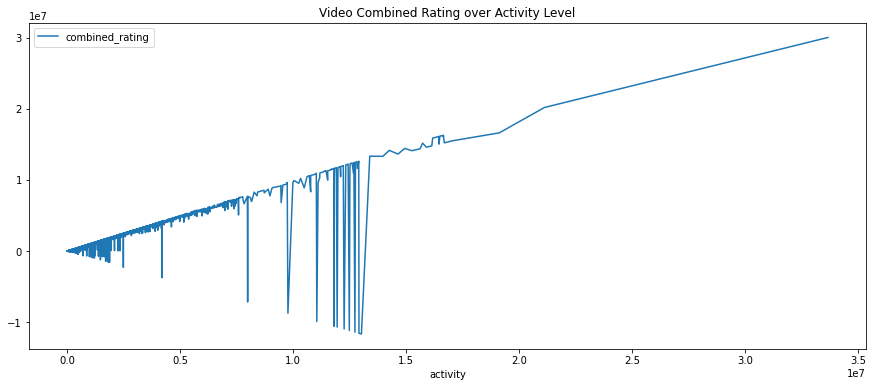

In [26]:
video_responses.plot.line(x='activity',
                          y=['combined_rating'],
                          figsize=(15, 6),
                          title='Video Combined Rating over Activity Level')

<AxesSubplot:title={'center':'Video Responses over Activity Level'}, xlabel='activity'>

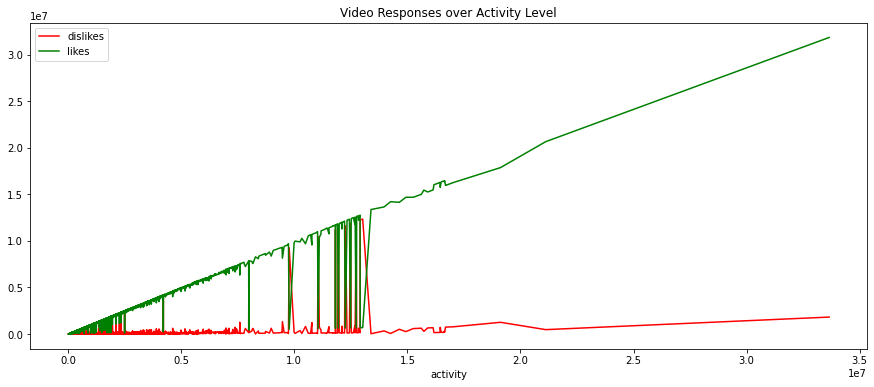

In [117]:
video_responses.plot.line(x='activity',
                          y=['dislikes', 'likes'],
                          figsize=(15, 6),
                          title='Video Responses over Activity Level',
                          color=['red', 'green'])

<AxesSubplot:title={'center':'Video Responses over Activity Level'}, xlabel='activity'>

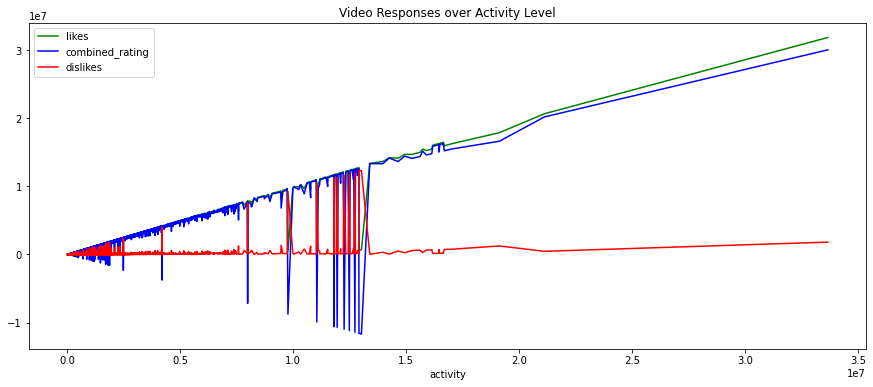

In [118]:
video_responses.plot.line(x='activity',
                          y=['likes', 'combined_rating', 'dislikes'],
                          figsize=(15, 6),
                          title='Video Responses over Activity Level',
                          color=['green', 'blue', 'red'])

In the above plots, it's clear that the combined rating seems to follow the like count very closely at high activity levels, but will spike away when there's lots of dislikes.

<AxesSubplot:title={'center':'Favorability over Logarithmic View Count'}, xlabel='view_count'>

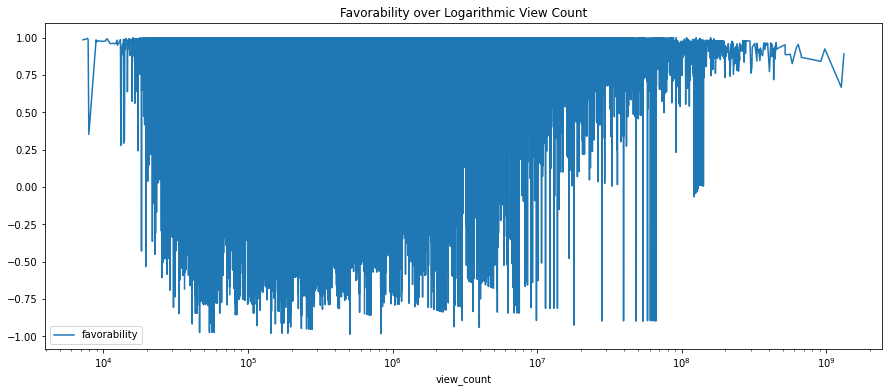

In [28]:
df[['favorability', 'view_count']].sort_values('view_count').plot.line(x='view_count',
                                                                       y='favorability',
                                                                       figsize=(15, 6),
                                                                       title='Favorability over Logarithmic View Count',
                                                                       logx=True)

<AxesSubplot:title={'center':'View Count vs Favorability Distribution'}, xlabel='favorability', ylabel='view_count'>

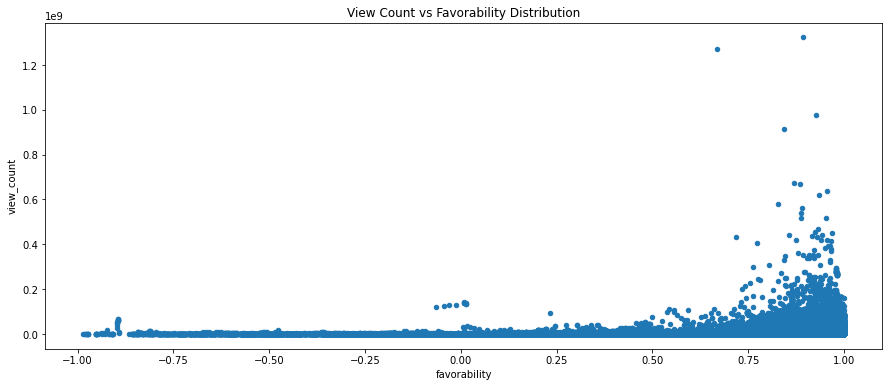

In [29]:
df[['favorability', 'view_count']].plot.scatter(x='favorability',
                                                y='view_count',
                                                figsize=(15, 6),
                                                title='View Count vs Favorability Distribution')

These plots help to demonstrate a few things.

- Most of the videos we have on record have **less than 200,000,000 views**. (0.2 on the graph). This lines up with what we found earlier by binning the view counts.
- Videos with **lots of views** are **generally received very highly**. On the flip side, most of the **disliked videos** have **low view counts.** This makes sense for a few reasons:
  - Most of our data is drawn from popular youtube videos.
  - Youtube probably doesn't promote videos that are not rated well, since they will generally not keep viewers on the platform. This means that videos with lots of dislikes will probably get less views and traffic total.
  - Our **favorability rating is more volatile with lower total like/dislike counts,** so it is easier for videos with few likes (and views) to become strongly liked or strongly disliked.
- Overall, videos are **largely positively received**. Negative reactions to videos are not very common. There are spikes near the highly disliked (near -0.9), contentious (near 0), and a highly liked (near 0.9)

Both of these plots demonstrate that videos that are percieved strongly (high interaction with the like/dislike buttons), are overwhelmingly percieved in a **positive light**, at least in the data we have collected. This could be due to bias in our data, since most of our data is drawn from popular youtube videos.

In [30]:
cap = 1.0*10**8
cap

100000000.0

Zooming in on the same data, for videos with less than 100,000,000 views (our "most videos" range high end from before):

In [51]:
focused_df = df[['favorability', 'view_count']][df['view_count'] < cap]

<AxesSubplot:xlabel='favorability', ylabel='view_count'>

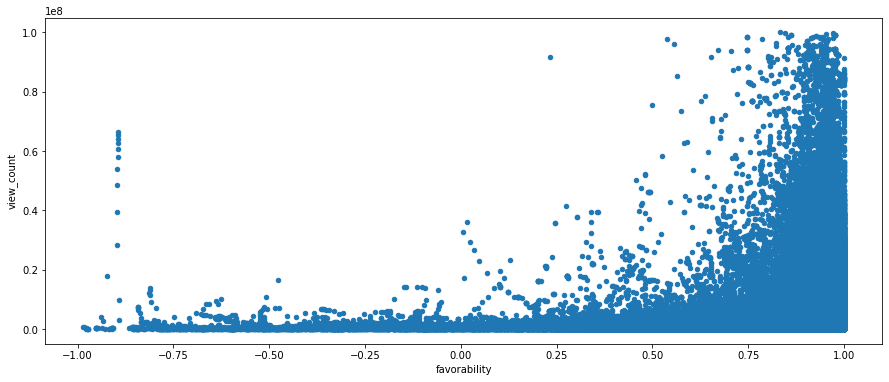

In [52]:
focused_df.plot.scatter(x='favorability', y='view_count', figsize=(15, 6))

Let's take a look at how many views less favorable videos tend to get:

In [32]:
unfavorable_videos = df[df['favorability'] < 0.0].copy()

<AxesSubplot:title={'center':'View count on Unfavorable Videos'}, xlabel='favorability'>

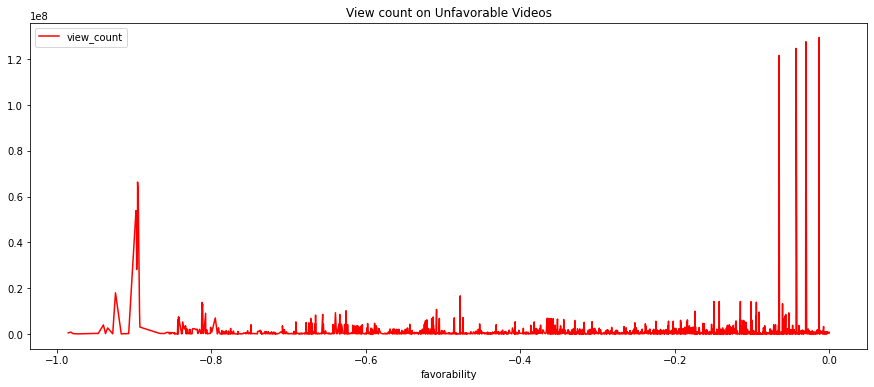

In [33]:
unfavorable_videos.sort_values('favorability').plot.line(x='favorability',
                                                                   logy=False,
                                                                   y=['view_count'],
                                                                   figsize=(15, 6),
                                                                   title='View count on Unfavorable Videos',
                                                                   color='red')

In [34]:
unfavorable_videos['view_count'].describe()

count    3.148000e+03
mean     1.088720e+06
std      5.616240e+06
min      1.833800e+04
25%      1.467355e+05
50%      3.073730e+05
75%      7.141050e+05
max      1.294724e+08
Name: view_count, dtype: float64

<AxesSubplot:>

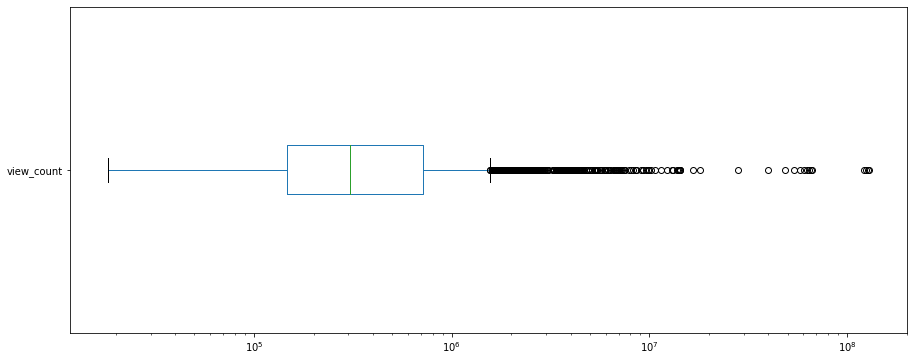

In [35]:
unfavorable_videos['view_count'].plot.box(figsize=(15, 6), vert=False, logx=True)

In [36]:
favorable_videos = df[df['favorability'] > 0.0].copy()

<AxesSubplot:title={'center':'View count on Favorable Videos'}, xlabel='favorability'>

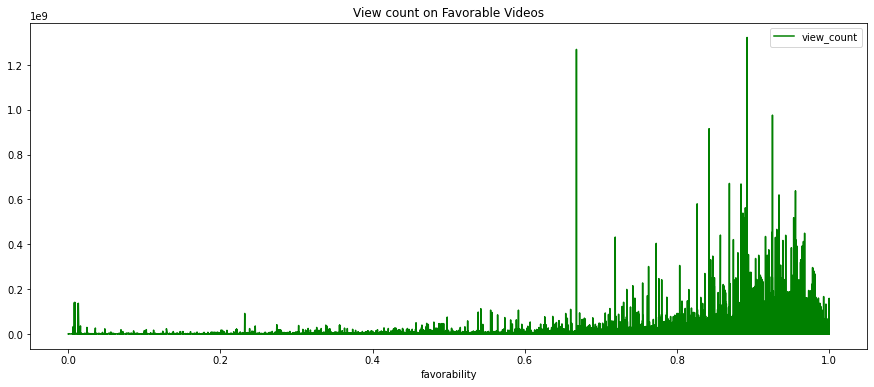

In [37]:
favorable_videos.sort_values('favorability').plot.line(x='favorability',
                                                                   logy=False,
                                                                   y=['view_count'],
                                                                   figsize=(15, 6),
                                                                   title='View count on Favorable Videos',
                                                                   color='green')

In [38]:
favorable_videos['view_count'].describe()

count    1.014753e+06
mean     1.878618e+06
std      7.602138e+06
min      0.000000e+00
25%      2.163580e+05
50%      5.241770e+05
75%      1.356269e+06
max      1.322797e+09
Name: view_count, dtype: float64

<AxesSubplot:>

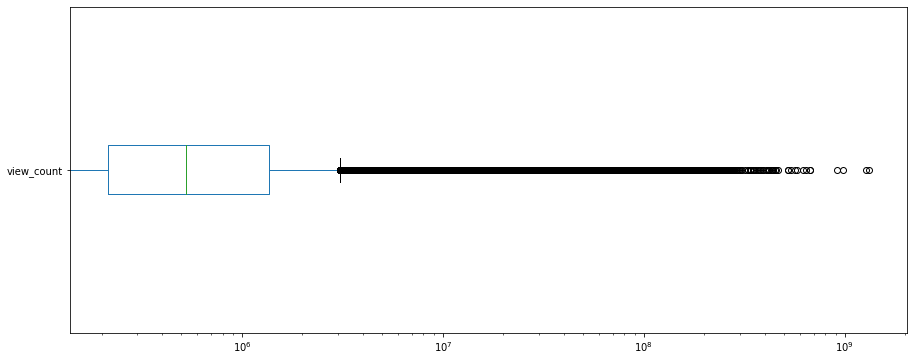

In [39]:
favorable_videos['view_count'].plot.box(figsize=(15, 6), vert=False, logx=True)

## Distribution

Let's look at the distribution of view counts for favorable/unfavorable/all videos

In [40]:
df3 = pd.DataFrame()

In [41]:
df.shape

(1032705, 23)

In [42]:
favorable_videos.shape

(1014753, 23)

In [43]:
unfavorable_videos.shape

(3148, 23)

In [44]:
df3['unfavorable_views'] = unfavorable_videos['view_count']
df3['all_views']         = df['view_count']
df3['favorable_views']   = favorable_videos['view_count']

<AxesSubplot:>

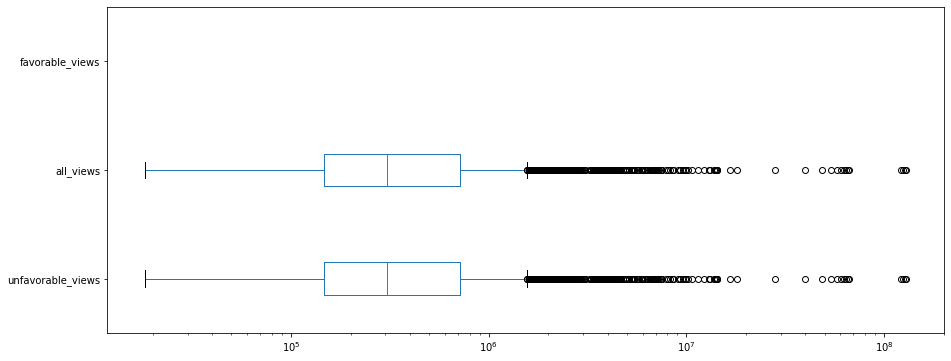

In [45]:
df3.plot.box(vert=False, figsize=(15, 6), logx=True)

Not sure why the Favorable isn't showing up?

## Examining Specific Videos

In [46]:
df['favorability'].min()

-0.985285682770792

In [47]:
df[df['favorability'] == -0.985285682770792]

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,...,channelId,channelTitle,categoryId,trending_date,thumbnail_link,comments_disabled,ratings_disabled,combined_rating,activity,favorability
911877,uretrfMA-Io,Amber Heard's 2020 Takeaway: 'Adapt & Survive',NaN,NaN,NaN,507439,667,89993,27598,Access|amber heard|the stand|tv|celebrity|inte...,...,UCiKGMZZmZXK-RpbKJGXgH3Q,Access,24.0,2020-12-23T00:00:00Z,https://i.ytimg.com/vi/uretrfMA-Io/default.jpg,False,False,-89326,90660,-0.985286


In [48]:
2455251 / 89993

27.282688653561944

The most unfavorable video we have on record is [Amber Heard's 2020 Takeaway: 'Adapt & Survive'](https://www.youtube.com/watch?v=uretrfMA-Io). It appears to be contentious because it is an actress talking about domestic abuse, and there is dispute over the circumstances. Not our place to comment on this.

Since the dataset recorded data on this video, it now has 2,455,251 views (27 times more than when data was collected) and the Youtube Dislike API reports it has ~475,000 dislikes.

In [49]:
df['dislikes'].max()

12341474

In [50]:
df[df['dislikes'] == 12341474]

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,...,channelId,channelTitle,categoryId,trending_date,thumbnail_link,comments_disabled,ratings_disabled,combined_rating,activity,favorability
492064,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,NaN,NaN,NaN,66344227,680408,12341474,1080479,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,...,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24.0,2020-08-22T00:00:00Z,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,-11661066,13021882,-0.895498


The most disliked video we have on record is the [trailer for the movie Sandak 2](https://www.youtube.com/watch?v=Iot0eF6EoNA), which according to [Wikipedia](https://en.wikipedia.org/wiki/List_of_most-disliked_YouTube_videos#:~:text=In%20August%202020%2C%20the%20Indian%20film%20Sadak%202%27s%20trailer%20became%20the%20most%20disliked%20movie%20trailer%20on%20YouTube.), 'became the most disliked movie trailer on YouTube.'

## Exporting

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032705 entries, 0 to 1032704
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   video_id           1032705 non-null  object 
 1   title              1032705 non-null  object 
 2   channel_id         37422 non-null    object 
 3   channel_title      37422 non-null    object 
 4   published_at       37422 non-null    object 
 5   view_count         1032705 non-null  int64  
 6   likes              1032705 non-null  int64  
 7   dislikes           1032705 non-null  int64  
 8   comment_count      1032705 non-null  int64  
 9   tags               1032705 non-null  object 
 10  description        1005092 non-null  object 
 11  comments           37264 non-null    object 
 12  publishedAt        995283 non-null   object 
 13  channelId          995283 non-null   object 
 14  channelTitle       995282 non-null   object 
 15  categoryId         995283 non-nu

In [91]:
# export_df = df[['favorability', 'view_count', 'title', 'likes', 'dislikes', 'video_id']][df['view_count'] < cap]

# df['combined_rating'] = df['likes'] - df['dislikes']
# df['activity'] = df['likes'] + df['dislikes']
# df['favorability'] = df['combined_rating'] / df['activity']

export_df = df[['title', 'view_count', 'favorability', 'likes', 'dislikes', 'video_id']][df['view_count'] < cap].copy()

In [114]:
to_export = export_df.sample(frac=0.01, random_state=1)
to_export

,title,view_count,favorability,likes,dislikes,video_id
226792,Behind The Set Of Squid Game,3808457,0.963466,87388,1626,I1Rei-EpAB8
97235,"Dilsinho, Bianca Andrade - Hollywood",850069,0.973986,43480,573,QpyVX56kQlY
587567,隠していたことがあります。やっと公表する覚悟ができました。,1731901,0.709865,34812,5907,stHhVJMIaxw
890195,Три недели протестам в Беларуси: уйдёт ли Лука...,547759,0.947989,35019,935,g4KUu2kNQQU
767093,재난지원금,1973490,0.861548,53943,4012,o31kKZbxDro
...,...,...,...,...,...,...
510295,Important Updates | उद्यापासून हे नियम बदलणार,1117861,0.843703,10357,878,3Yz-1FxWun8
651889,あれ…ただの開封動画になってしまった…【難聴うさぎ】【TikTok】,837844,0.902534,17158,879,Q7570wPOFto
302403,Minecraft als Geist durchspielen!,74535,0.976178,7549,91,9qtZQhHfI1w
410212,MON MEILLEUR AMI EST MORT 💀 ET SON FANTÔME 👻 M...,257871,0.950511,10208,259,BYuZJdM7OMU


In [108]:
to_export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 226792 to 45685
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         103 non-null    object 
 1   view_count    103 non-null    int64  
 2   favorability  102 non-null    float64
 3   likes         103 non-null    int64  
 4   dislikes      103 non-null    int64  
 5   video_id      103 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.6+ KB


In [109]:
to_export.to_csv("master_export_fragment.csv")

In [110]:
to_export['favorability'].min()

0.13408892763731473

In [111]:
to_export['favorability'].max()

1.0

In [112]:
to_export['view_count'].min()

22800

In [113]:
to_export['view_count'].max()

8804827